In [1]:
import pandas as pd
import numpy as np

# Data frame
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

# read_csv assumes the data has a header; we need to specify that it doesn't
df = pd.read_csv(url, header = None)

In [2]:
#Pandas assigns the headers as integer values. To assign column names:

headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = headers

In [3]:
#df prints the entire dataframe (not recommended for large datasets)
#df.head(n) prints the first n rows
#df.tail(n) prints the last n rows
#df.loc[20:25] gives us rows 20-25

df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
#To access a specific column:

df["symboling"]

#df["symboling"].loc[20:25] gives us rows 20 to 25

,symboling
0,3
1,3
2,1
3,2
4,2
...,...
200,-1
201,-1
202,-1
203,-1


Dealing With Missing Values

In [11]:
# This replaces all question marks with the acronym NaN

df.replace("?", np.nan, inplace = True)

# This code helps us drop rows where NaN appears; axis = 0 drops rows; axis = 1 drops columns

df.dropna(subset = ["normalized-losses"], axis = 0, inplace = True)

# To reset all index values
df.reset_index(drop=True, inplace=True)

# Replacing missing values under "normalized-losses" with the mean:

mean = df["normalized-losses"].astype("float").mean()
df["normalized-losses"].replace(np.nan, mean)

df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [12]:
# This tells us which specific data points are missing values
missing_data = df.isnull()

# This loop counts the total number of missing values under each input feature
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

#This helps us access which rows have missing values under the column Screen_Size_cm
#missing_screen_size_rows = df[df['Screen_Size_cm'].isnull()]
#missing_screen_size_rows

symboling
False    164
Name: count, dtype: int64

normalized-losses
False    164
Name: count, dtype: int64

make
False    164
Name: count, dtype: int64

fuel-type
False    164
Name: count, dtype: int64

aspiration
False    164
Name: count, dtype: int64

num-of-doors
False    163
True       1
Name: count, dtype: int64

body-style
False    164
Name: count, dtype: int64

drive-wheels
False    164
Name: count, dtype: int64

engine-location
False    164
Name: count, dtype: int64

wheel-base
False    164
Name: count, dtype: int64

length
False    164
Name: count, dtype: int64

width
False    164
Name: count, dtype: int64

height
False    164
Name: count, dtype: int64

curb-weight
False    164
Name: count, dtype: int64

engine-type
False    164
Name: count, dtype: int64

num-of-cylinders
False    164
Name: count, dtype: int64

engine-size
False    164
Name: count, dtype: int64

fuel-system
False    164
Name: count, dtype: int64

bore
False    160
True       4
Name: count, dtype: int64

stroke

Data Formatting

In [13]:
# Data formating ensures consistency; I may want to convert mpg to L/100 km. Here's how

df["highay-mpg"] = 235/df["highway-mpg"]
df.rename(columns = {"highway-mpg":"L/100 km"}, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,L/100 km,price,highay-mpg
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,7.833333
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,10.681818
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710,9.400000
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875,11.750000
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.8,101,5800,23,29,16430,8.103448


In [14]:
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [15]:
# Sometimes, the wrong data type is assigned to a feature; price shouldn't be an object
df["price"].head(5)

# Here, we convert the price to an integer
df["price"] = df["price"].astype("int64")
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


Data Normalization

In [ ]:
# Normalizing the length feature using simple feature scaling.
# Here, we divide each value by the maximum length
# df["length"] = df["length"]/ df["length"].max()
# df["length"]

In [ ]:
# Normalizing the length by using the min-max method.
# Here, we subtract each value by its minimum and divide by the range
# df["length"] = (df["length"] - df["length"].min())/(df["length"].max() - df["length"].min())
# df["length"].head(5)

In [ ]:
# Normalizing the length by using the z-score method.
# Here, we subtract each value by the average and divide by the standard deviation
# df["length"] = (df["length"] - df["length"].mean())/ (df["length"].std())
# df["length"]

Binning

In [ ]:
# Binning is converting numerical values into categorical variables
# This code returns 4 evenly spaced numbers over the price interval

bins = np.linspace(df["price"].min(), df["price"].max(), 4)

# This creates the 3 different bin names

group_names = ["Low", "Medium", "High"]

#This creates a new column called price-binned and categorizes the cars into different bins

df["price-binned"] = pd.cut(df["price"], bins, labels = group_names, include_lowest = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,L/100 km,price,highay-mpg,price-binned
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,7.833333,Low
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,10.681818,Medium
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.40,8.5,110,5500,19,25,17710,9.400000,Medium
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.40,8.3,140,5500,17,20,23875,11.750000,Medium
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,3.50,2.80,8.8,101,5800,23,29,16430,8.103448,Medium


Exploratory Data Analysis

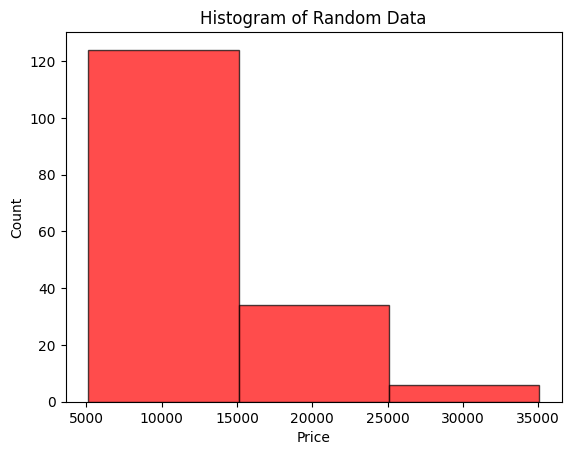

In [16]:
#Visualizing the distribution of bins

import matplotlib.pyplot as plt
import numpy as np


data = df["price"]

# Create and customize the histogram
plt.hist(data, bins=3, color='red', edgecolor='black', alpha=0.7)
plt.title('Histogram of Random Data')
plt.xlabel('Price')
plt.ylabel('Count')

# Display the histogram
plt.show()

# Here, we see that most prices fall under the "low" category

In [18]:
# To count how many values are in each bin:
df["fuel-type"].value_counts()

,count
fuel-type,
gas,149
diesel,15


In [20]:
# GrouBy helps us compare different input features to the overall price

df_test = df[["drive-wheels", "body-style", "price"]]
df_grp = df_test.groupby(["drive-wheels", "body-style"], as_index = False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,hardtop,8249.000000
4,fwd,hatchback,7989.800000
5,fwd,sedan,9538.509804
6,fwd,wagon,8829.222222
7,rwd,convertible,26362.500000
8,rwd,hardtop,14365.750000
9,rwd,hatchback,14376.071429


In [22]:
# The previous table is difficult to read. We can transform it to a pivot table to make it easier to interpret

df_pivot = df_grp.pivot(index = "drive-wheels", columns = "body-style")
df_pivot

price                                                    
body-style   convertible   hardtop     hatchback         sedan         wagon
drive-wheels                                                                
4wd                  NaN       NaN   7603.000000  12647.333333   9095.750000
fwd                  NaN   8249.00   7989.800000   9538.509804   8829.222222
rwd              26362.5  14365.75  14376.071429  18318.576923  19282.000000

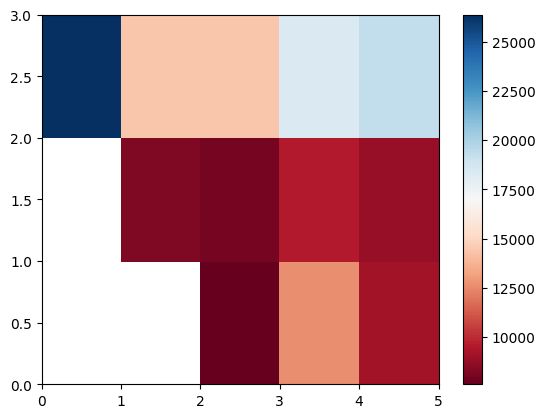

In [23]:
# Heatmaps use color intensity to plot data over multiple values

import matplotlib.pyplot as plt
plt.pcolor(df_pivot, cmap = "RdBu")
plt.colorbar()
plt.show()


(0.0, 38116.85800271472)

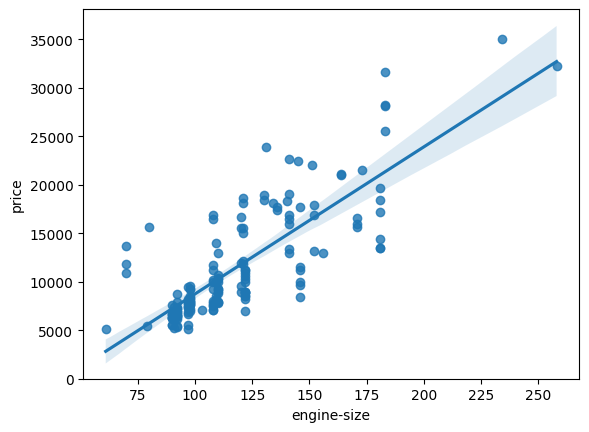

In [24]:
#Seaborn is like matplotlib... We can use the scatterplot to assess correlation
import seaborn as sns
sns.regplot(x = "engine-size", y = "price", data = df)
plt.ylim(0,)

In [25]:
# To measure correlation, here's what you do:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

# Here, the columns are rows are filtered to only keep float64 and int64.
# It calculates the correlation matrix using Pearson's correlation


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,L/100 km,price,highay-mpg
symboling,1.000000,-0.522159,-0.334736,-0.208303,-0.516420,-0.246281,-0.169342,-0.141755,0.013028,0.078220,-0.144078,-0.037306
wheel-base,-0.522159,1.000000,0.871641,0.811949,0.558956,0.808489,0.650577,0.295342,-0.535380,-0.572540,0.726600,0.566365
length,-0.334736,0.871641,1.000000,0.837930,0.496802,0.869949,0.716208,0.190043,-0.683543,-0.690581,0.756060,0.681053
width,-0.208303,0.811949,0.837930,1.000000,0.283885,0.870256,0.756317,0.261152,-0.644124,-0.674959,0.841883,0.712253
height,-0.516420,0.558956,0.496802,0.283885,1.000000,0.358663,0.174557,0.236149,-0.112150,-0.146788,0.224936,0.116227
curb-weight,-0.246281,0.808489,0.869949,0.870256,0.358663,1.000000,0.867894,0.226822,-0.732746,-0.765103,0.891750,0.801230
engine-size,-0.169342,0.650577,0.716208,0.756317,0.174557,0.867894,1.000000,0.146519,-0.599425,-0.625054,0.807566,0.668749
compression-ratio,-0.141755,0.295342,0.190043,0.261152,0.236149,0.226822,0.146519,1.000000,0.278269,0.223595,0.209138,-0.179676
city-mpg,0.013028,-0.535380,-0.683543,-0.644124,-0.112150,-0.732746,-0.599425,0.278269,1.000000,0.972996,-0.678644,-0.925500
L/100 km,0.078220,-0.572540,-0.690581,-0.674959,-0.146788,-0.765103,-0.625054,0.223595,0.972996,1.000000,-0.709135,-0.961054


In [26]:
# We can measure the correlation of a smaller dataset:
df[["bore", "stroke", "compression-ratio"]].corr()

,bore,stroke,compression-ratio
bore,1.000000,-0.105464,0.019216
stroke,-0.105464,1.000000,0.240895
compression-ratio,0.019216,0.240895,1.000000
